<a href="https://colab.research.google.com/github/debduttamahato/CapstoneProject-using-Python-Only-/blob/main/Zara_Sales_Analysis_%26_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('/content/Zara_Sales_Analysis.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [5]:
#df.head()
df['Product Category'].unique()

array(['Clothing'], dtype=object)

In [3]:
#missing values
missing_values=df.isnull().sum()
print(missing_values)

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64


In [4]:
#dropping duplicate values
df=df.drop_duplicates()
missing_values=df.isnull().sum()
print(missing_values)

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64


In [6]:
#dropping non-required columns
df=df.drop(['url','sku','description','currency','scraped_at','brand','Product Category'],axis=1)
df.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,terms,section
0,185102,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,jackets,MAN
1,188771,Aisle,No,No,654,TUXEDO JACKET,169.00,jackets,MAN
2,180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,jackets,MAN
3,112917,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,jackets,MAN
4,192936,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,jackets,MAN


In [8]:
#handling missing values
df = df.dropna(subset=['name'],axis=0)
missing_values=df.isnull().sum()
print(missing_values)

Product ID          0
Product Position    0
Promotion           0
Seasonal            0
Sales Volume        0
name                0
price               0
terms               0
section             0
dtype: int64


In [9]:
#EDA
df.describe()

,Product ID,Sales Volume,price
count,251.000000,251.000000,251.000000
mean,153290.003984,1823.645418,86.082231
std,26181.420512,699.097176,52.116910
min,110075.000000,529.000000,7.990000
25%,130809.500000,1241.000000,49.900000
50%,151438.000000,1841.000000,79.900000
75%,175755.500000,2400.500000,109.000000
max,199631.000000,2989.000000,439.000000


In [15]:
#kpi
df['Revenue']=df['price']*df['Sales Volume']
df1=df.groupby(['name','Product Position'])[['Sales Volume','Revenue']].sum()
print(df1)

                                                  Sales Volume   Revenue
name                            Product Position                        
100% FEATHER FILL PUFFER JACKET Aisle                      656  110864.0
                                End-cap                   2347  210995.3
100% LINEN OVERSHIRT            End-cap                   2474  222412.6
100% WOOL SUIT JACKET           Aisle                     1916  323804.0
ABSTRACT JACQUARD SWEATER       Front of Store             529   31687.1
...                                                        ...       ...
WOOL BLEND TEXTURED JACKET      End-cap                   2366  447174.0
WOVEN LEATHER SLIDES            Aisle                     1237   61726.3
ZIPPER MULTIPIECE SNEAKERS      End-cap                   2114  147768.6
ZIPPERED JACKET                 Aisle                     1412   84578.8
ZIPPERED WOOL BLEND OVERSHIRT   End-cap                   1506  164154.0

[232 rows x 2 columns]


/tmp/ipython-input-2643440189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue']=df['price']*df['Sales Volume']


In [17]:
df2=df.groupby('section')[['Sales Volume','Revenue']].sum()
print(df2)

         Sales Volume      Revenue
section                           
MAN            394361  35475561.03
WOMAN           63374   3275813.45


In [18]:
df3=df.groupby('Seasonal')[['Sales Volume','Revenue']].sum()
print(df3)

          Sales Volume      Revenue
Seasonal                           
No              224554  18919285.82
Yes             233181  19832088.66


In [19]:
df3=df.groupby('Promotion')[['Sales Volume','Revenue']].sum()
print(df3)

           Sales Volume      Revenue
Promotion                           
No               240312  18994089.58
Yes              217423  19757284.90


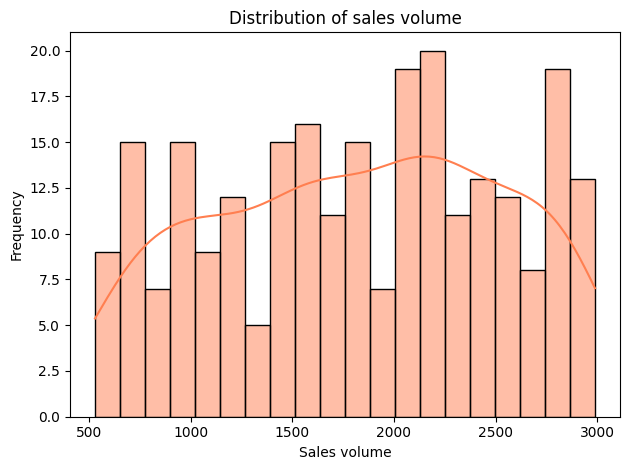

In [23]:
# Histogram of sales volume
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x="Sales Volume",bins=20, color="coral", kde=True)
plt.title("Distribution of sales volume")
plt.xlabel("Sales volume")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

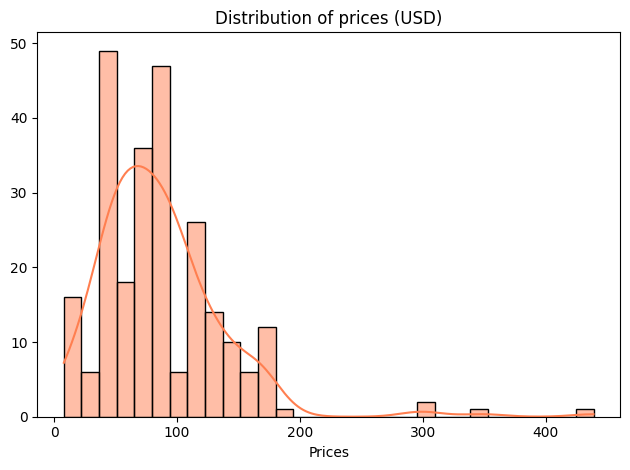

In [24]:
# Distribution of prices
sns.histplot(data=df, x="price", bins=30, color="coral", kde=True)
plt.title("Distribution of prices (USD)")
plt.xlabel("Prices")
plt.ylabel("")

plt.tight_layout()
plt.show()

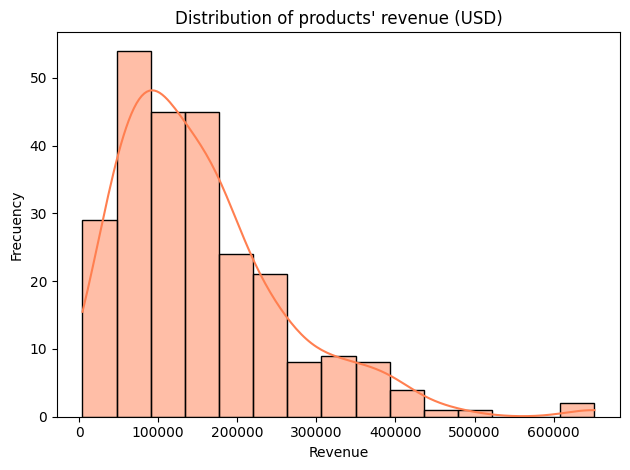

In [26]:
# Distribution of products' revenue
sns.histplot(data=df, x="Revenue", bins=15, color="coral", kde=True)
plt.title("Distribution of products' revenue (USD)")
plt.xlabel("Revenue")
plt.ylabel("Frecuency")

plt.tight_layout()
plt.show()

In [27]:
import numpy as np
bins=np.linspace(min(df['price']),max(df['price']),5)
group=['Low','Medium','High','Premium']
df['Price_Category']=pd.cut(df['price'],bins=bins,labels=group)
df.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,terms,section,Revenue,Price_Category
0,185102,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,jackets,MAN,56431.77,Low
1,188771,Aisle,No,No,654,TUXEDO JACKET,169.00,jackets,MAN,110526.00,Medium
2,180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,jackets,MAN,286380.00,Medium
3,112917,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,jackets,MAN,202272.00,Medium
4,192936,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,jackets,MAN,408938.00,Medium


/tmp/ipython-input-752945518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="section",y='Sales Volume',estimator=sum,palette="rocket",ax=axes[0,0])
/tmp/ipython-input-752945518.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-752945518.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-752945518.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


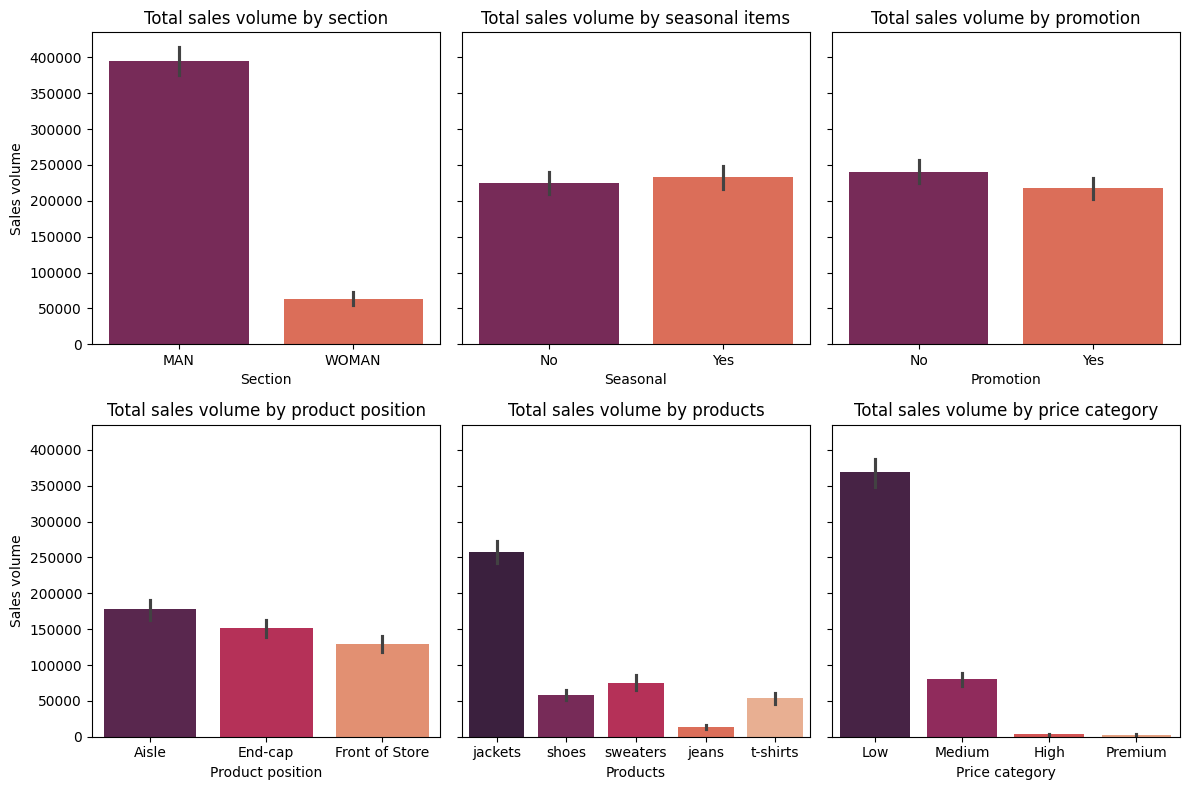

In [28]:
# Analyzing results for total sales volume by different categories

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True)
# Chart 1:
sns.barplot(data=df,x="section",y='Sales Volume',estimator=sum,palette="rocket",ax=axes[0,0])
axes[0,0].set_title("Total sales volume by section")
axes[0,0].set_xlabel("Section")
axes[0,0].set_ylabel("Sales volume")

# Chart 2:
sns.barplot(
    data=df,x='Seasonal',y='Sales Volume',estimator=sum,palette="rocket",ax=axes[0,1])
axes[0,1].set_title("Total sales volume by seasonal items")
axes[0,1].set_xlabel("Seasonal")
axes[0,1].set_ylabel("")

# Chart 3:
sns.barplot(
    data=df,x='Promotion',y='Sales Volume',estimator=sum,palette="rocket",ax=axes[0,2])
axes[0,2].set_title('Total sales volume by promotion')
axes[0,2].set_xlabel("Promotion")
axes[0,2].set_ylabel("")

# Chart 4
sns.barplot(
    data=df,x="Product Position",y="Sales Volume",estimator=sum,palette="rocket",ax=axes[1,0])
axes[1,0].set_title("Total sales volume by product position")
axes[1,0].set_xlabel("Product position")
axes[1,0].set_ylabel("Sales volume")

# Chart 5
sns.barplot(
    data=df,x="terms",y="Sales Volume",estimator=sum,palette="rocket",ax=axes[1,1])
axes[1,1].set_title("Total sales volume by products")
axes[1,1].set_xlabel("Products")
axes[1,1].set_ylabel("")

# Chart 6
sns.barplot(
    data=df,x="Price_Category",y="Sales Volume",estimator=sum,palette="rocket",ax=axes[1,2])
axes[1,2].set_title("Total sales volume by price category")
axes[1,2].set_xlabel("Price category")
axes[1,2].set_ylabel("")

fig.tight_layout()
plt.show()

/tmp/ipython-input-3852738285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="section",y='Sales Volume',estimator=np.mean,palette="rocket",ax=axes[0,0])
/tmp/ipython-input-3852738285.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3852738285.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3852738285.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

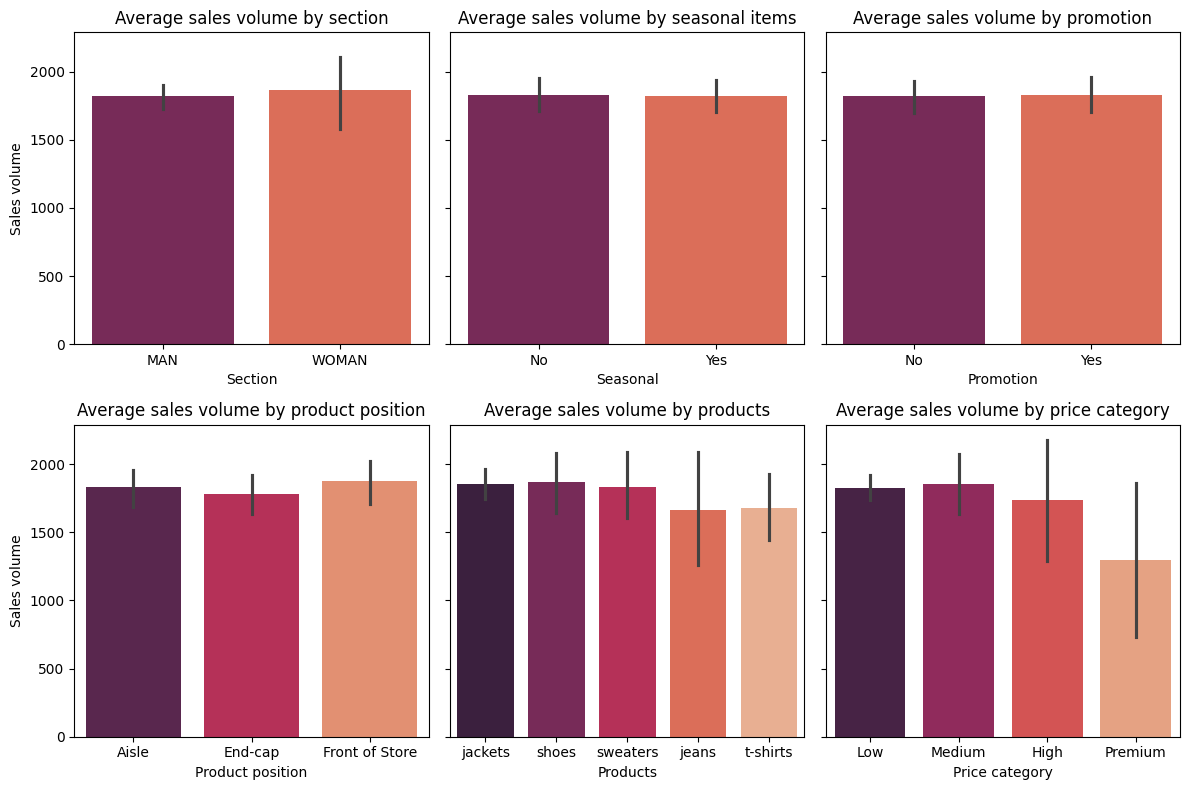

In [29]:
# Analyzing results for average sales volume by different categories

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True)
# Chart 1:
sns.barplot(data=df,x="section",y='Sales Volume',estimator=np.mean,palette="rocket",ax=axes[0,0])
axes[0,0].set_title("Average sales volume by section")
axes[0,0].set_xlabel("Section")
axes[0,0].set_ylabel("Sales volume")

# Chart 2:
sns.barplot(
    data=df,x='Seasonal',y='Sales Volume',estimator=np.mean,palette="rocket",ax=axes[0,1])
axes[0,1].set_title("Average sales volume by seasonal items")
axes[0,1].set_xlabel("Seasonal")
axes[0,1].set_ylabel("")

# Chart 3:
sns.barplot(
    data=df,x='Promotion',y='Sales Volume',estimator=np.mean,palette="rocket",ax=axes[0,2])
axes[0,2].set_title('Average sales volume by promotion')
axes[0,2].set_xlabel("Promotion")
axes[0,2].set_ylabel("")

# Chart 4
sns.barplot(
    data=df,x="Product Position",y="Sales Volume",estimator=np.mean,palette="rocket",ax=axes[1,0])
axes[1,0].set_title("Average sales volume by product position")
axes[1,0].set_xlabel("Product position")
axes[1,0].set_ylabel("Sales volume")

# Chart 5
sns.barplot(
    data=df,x="terms",y="Sales Volume",estimator=np.mean,palette="rocket",ax=axes[1,1])
axes[1,1].set_title("Average sales volume by products")
axes[1,1].set_xlabel("Products")
axes[1,1].set_ylabel("")

# Chart 6
sns.barplot(
    data=df,x="Price_Category",y="Sales Volume",estimator=np.mean,palette="rocket",ax=axes[1,2])
axes[1,2].set_title("Average sales volume by price category")
axes[1,2].set_xlabel("Price category")
axes[1,2].set_ylabel("")

fig.tight_layout()
plt.show()

/tmp/ipython-input-3584867070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="section",y="Revenue",estimator=sum,palette="rocket",ax=axes[0,0])
/tmp/ipython-input-3584867070.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3584867070.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3584867070.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



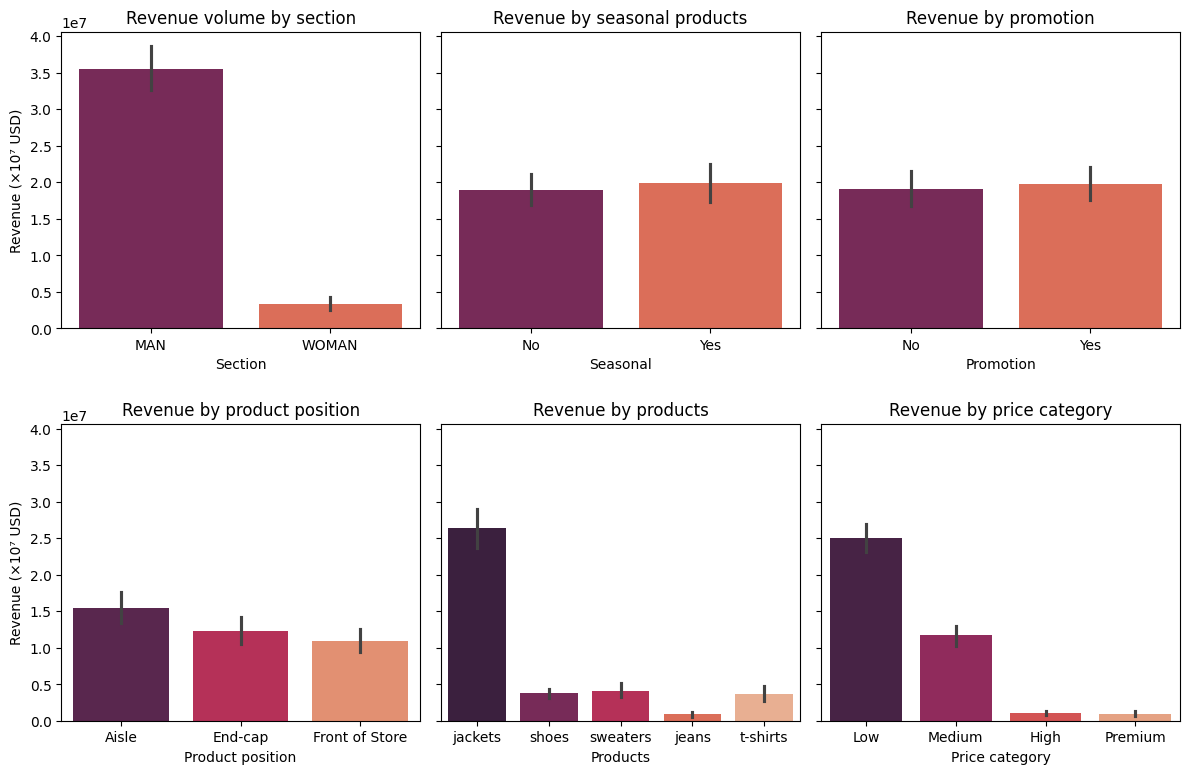

In [30]:
# Reviewing total revenue by each category
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True)
# Chart 1:
sns.barplot(data=df,x="section",y="Revenue",estimator=sum,palette="rocket",ax=axes[0,0])
axes[0,0].set_title("Revenue volume by section")
axes[0,0].set_xlabel("Section")
axes[0,0].set_ylabel("Revenue (×10⁷ USD)")

# Chart 2:
sns.barplot(
    data=df,x="Seasonal",y="Revenue",estimator=sum,palette="rocket",ax=axes[0,1])
axes[0,1].set_title("Revenue by seasonal products")
axes[0,1].set_xlabel("Seasonal")
axes[0,1].set_ylabel("")

# Chart 3:
sns.barplot(
    data=df,x="Promotion",y="Revenue",estimator=sum,palette="rocket",ax=axes[0,2])
axes[0,2].set_title("Revenue by promotion")
axes[0,2].set_xlabel("Promotion")
axes[0,2].set_ylabel("")

# Chart 4
sns.barplot(
    data=df,x="Product Position",y="Revenue",estimator=sum,palette="rocket",ax=axes[1,0])
axes[1,0].set_title("Revenue by product position")
axes[1,0].set_xlabel("Product position")
axes[1,0].set_ylabel("Revenue (×10⁷ USD)")

# Chart 5
sns.barplot(
    data=df,x="terms",y="Revenue",estimator=sum,palette="rocket",ax=axes[1,1])
axes[1,1].set_title("Revenue by products")
axes[1,1].set_xlabel("Products")
axes[1,1].set_ylabel("")

# Chart 6
sns.barplot(
    data=df,x="Price_Category",y="Revenue",estimator=sum,palette="rocket",ax=axes[1,2])
axes[1,2].set_title("Revenue by price category")
axes[1,2].set_xlabel("Price category")
axes[1,2].set_ylabel("")

fig.tight_layout()
plt.show()


In [60]:
#just rough ignore
#df10=df[['Product ID', 'Name']].drop_duplicates()
df10=df[['Product ID', 'name']].drop_duplicates()
print(df10['name'].count())

251


In [32]:
df['Revenue']=df['price']*df['Sales Volume']
df4=df.groupby('name')[['Sales Volume','Revenue']].sum()
print(df4)

                                 Sales Volume   Revenue
name                                                   
100% FEATHER FILL PUFFER JACKET          3003  321859.3
100% LINEN OVERSHIRT                     2474  222412.6
100% WOOL SUIT JACKET                    1916  323804.0
ABSTRACT JACQUARD SWEATER                 529   31687.1
ABSTRACT PRINT KNIT T-SHIRT              2093   83510.7
...                                       ...       ...
WOOL BLEND TEXTURED JACKET               2366  447174.0
WOVEN LEATHER SLIDES                     1237   61726.3
ZIPPER MULTIPIECE SNEAKERS               2114  147768.6
ZIPPERED JACKET                          1412   84578.8
ZIPPERED WOOL BLEND OVERSHIRT            1506  164154.0

[194 rows x 2 columns]


/tmp/ipython-input-131430010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_sales,x="Revenue",y="name",palette="flare")


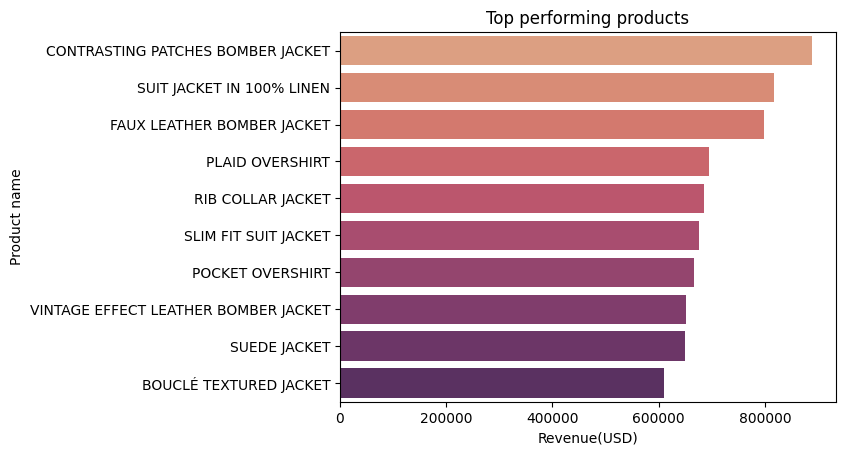

In [37]:
# Top ten best selling products

top_10_sales = df4.sort_values("Revenue", ascending=False).iloc[:10]

sns.barplot(data=top_10_sales,x="Revenue",y="name",palette="flare")
plt.title("Top performing products")
plt.ylabel("Product name")
plt.xlabel("Revenue(USD)")
plt.show()

/tmp/ipython-input-203155474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least_10_sales,x="Revenue",y="name",palette="flare")


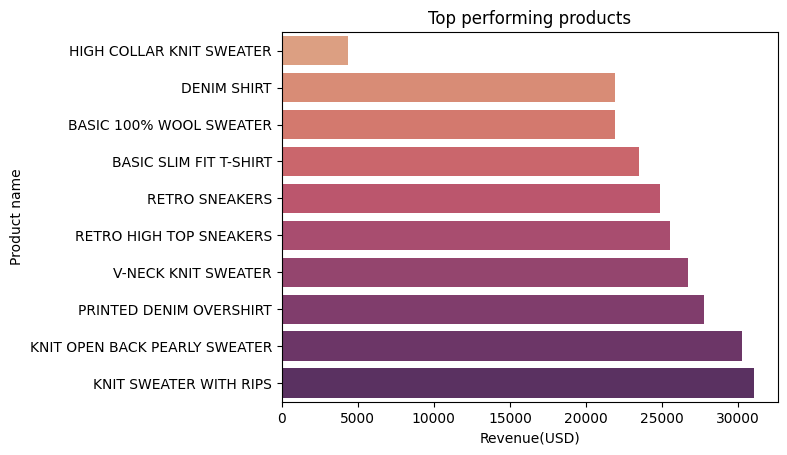

In [38]:
# Top ten best selling products

least_10_sales = df4.sort_values("Revenue", ascending=True).iloc[:10]

sns.barplot(data=least_10_sales,x="Revenue",y="name",palette="flare")
plt.title("Top performing products")
plt.ylabel("Product name")
plt.xlabel("Revenue(USD)")
plt.show()

In [39]:
df.corr(numeric_only=True)

,Product ID,Sales Volume,price,Revenue
Product ID,1.000000,-0.120626,-0.076552,-0.151747
Sales Volume,-0.120626,1.000000,-0.071522,0.500588
price,-0.076552,-0.071522,1.000000,0.753289
Revenue,-0.151747,0.500588,0.753289,1.000000


In [61]:
#choosing best polynomial
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
x=df[['Product ID','Sales Volume','price']]
y=df['Revenue']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
rsqu_test=[]
order=[1,2,3,4,5,6,7,8,9,10]
for n in order:
  pr=PolynomialFeatures(degree=n)
  x_train_pr=pr.fit_transform(x_train)
  x_test_pr=pr.fit_transform(x_test)
  lr=LinearRegression()
  lr.fit(x_train_pr,y_train)
  rsqu_test.append(lr.score(x_test_pr,y_test))
print(rsqu_test)

[0.881340405267898, 1.0, 0.9999999999999921, 0.9960351570182624, 0.9649586218725268, 0.9806563719476926, 0.9546858259059948, 0.9163536717940383, 0.8697538599662423, 0.8180011559214855]


In [62]:
from sklearn.pipeline import Pipeline
input=[('polynomial',PolynomialFeatures(degree=2)),('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(input)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print(r2_score(y_test,y_pred))

1.0


Model R^2 Score: 1.000
Model RMSE: 0.000


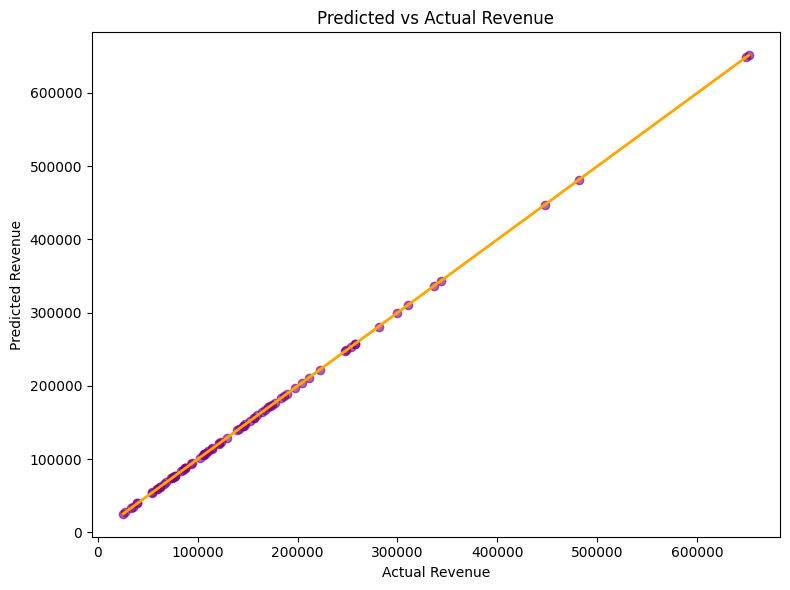

In [63]:
# Evaluate the model with R^2 score and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"Model R^2 Score: {r2:.3f}")
print(f"Model RMSE: {rmse:.3f}")

# Plotting predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Predicted vs Actual Revenue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', lw=2)
plt.tight_layout()
plt.show()

In [64]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipe,x_train,y_train,cv=5)
print(scores)

[1. 1. 1. 1. 1.]


In [65]:
#cross validation prediction
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(pipe,x_test,y_test,cv=5)
print(y_pred)

[167550.3   66630.48 172332.3  651521.   170765.7   87380.6  108904.2
  32916.66 110864.   139447.2   61924.8   54711.9   39740.4   25534.44
 447174.    83510.7   94305.1  222377.4  164154.   257556.   123303.6
 106371.   129105.3  247135.1  106835.9   59783.5  257024.1  343527.
 336432.   248949.   174727.   281111.    76408.5  145671.6  114915.6
 253425.   299409.   147479.   156576.   204342.7   85716.9  177196.5
 183396.   121136.7   73807.2  146021.1  481481.    59750.11  39795.3
 649140.    75282.3  105129.6   35029.8  186792.    68758.2   87840.71
  54529.2   77506.2   61964.7  106527.6  210995.3  102219.3  159842.2
 197150.7   27733.65  74453.4  189710.1  114233.7   93623.7  141128.1
  87813.4  152066.   121716.8  310541.   156099.4   77063.  ]


In [66]:
#revenue prediction
batch_data = [
    [185102, 2500, 59.99],
    [192936, 3000, 79.99]
]
predictions = pipe.predict(batch_data)
print(predictions)

[149975. 239970.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
